CIFAR-100 DATA VISUALISATION PART

The plan for Data Preparation(Visualisation) part :
 <br> 
>In this part we will take a look on what data we are using?
 <br> 
 >How it look like?
 <br> 
>What distribution this data undergoes?
 <br> 
>Analitics of the tabular representation of our data.
 <br> 
>Searching for NULL or missing values.
 <br> 
>Normalization and Standartization processes
 <br> 
>Sketching analytical graphs

                                 Analitics of normalized and augumented data                                                      

Loading train/test loader in order to perform analysis on normalized and augumented data <br>with necessary modules for its visualisation

In [53]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from data_cifar_100 import train_loader, train_set, test_loader, validation_set

Printing the appropriate sizes of traing sets

In [6]:
print(f"The size of training set is {len(train_set)} samples")
print(f"The size of validation set is {len(validation_set)} samples")

The size of training set is 45000 samples
The size of validation set is 5000 samples


Splitting training dataset to the features and targets(labels) for further analytics

In [54]:
train_data = train_set.dataset.data
train_labels = train_set.dataset.targets

Collecting first 1000 images from train loader (transformations are applied on them e.g normalization/standartization/horizont flips) 

In [ ]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 27095040000 bytes.

                                    Plotting few examples from original dataset                                                   

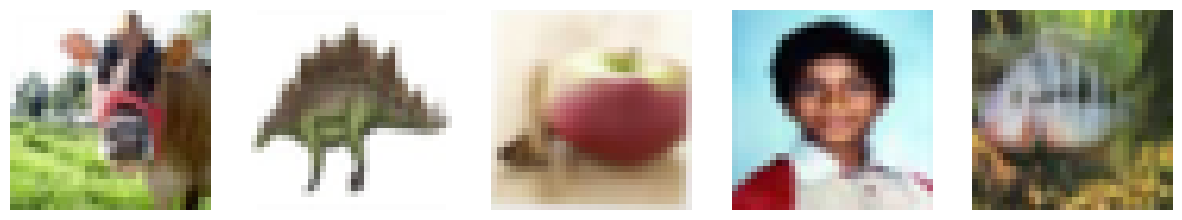

In [32]:
plt.figure(figsize=(15,10))
for i in range(5) :
  plt.subplot(1,5,i+1)
  plt.imshow(train_data[i,:,:,:])
  plt.axis("off")
plt.show()

Pixels distribution on original images

In [33]:
red = train_data[:,:,:,0].flatten()
green = train_data[:,:,:,1].flatten()
blue = train_data[:,:,:,2].flatten()

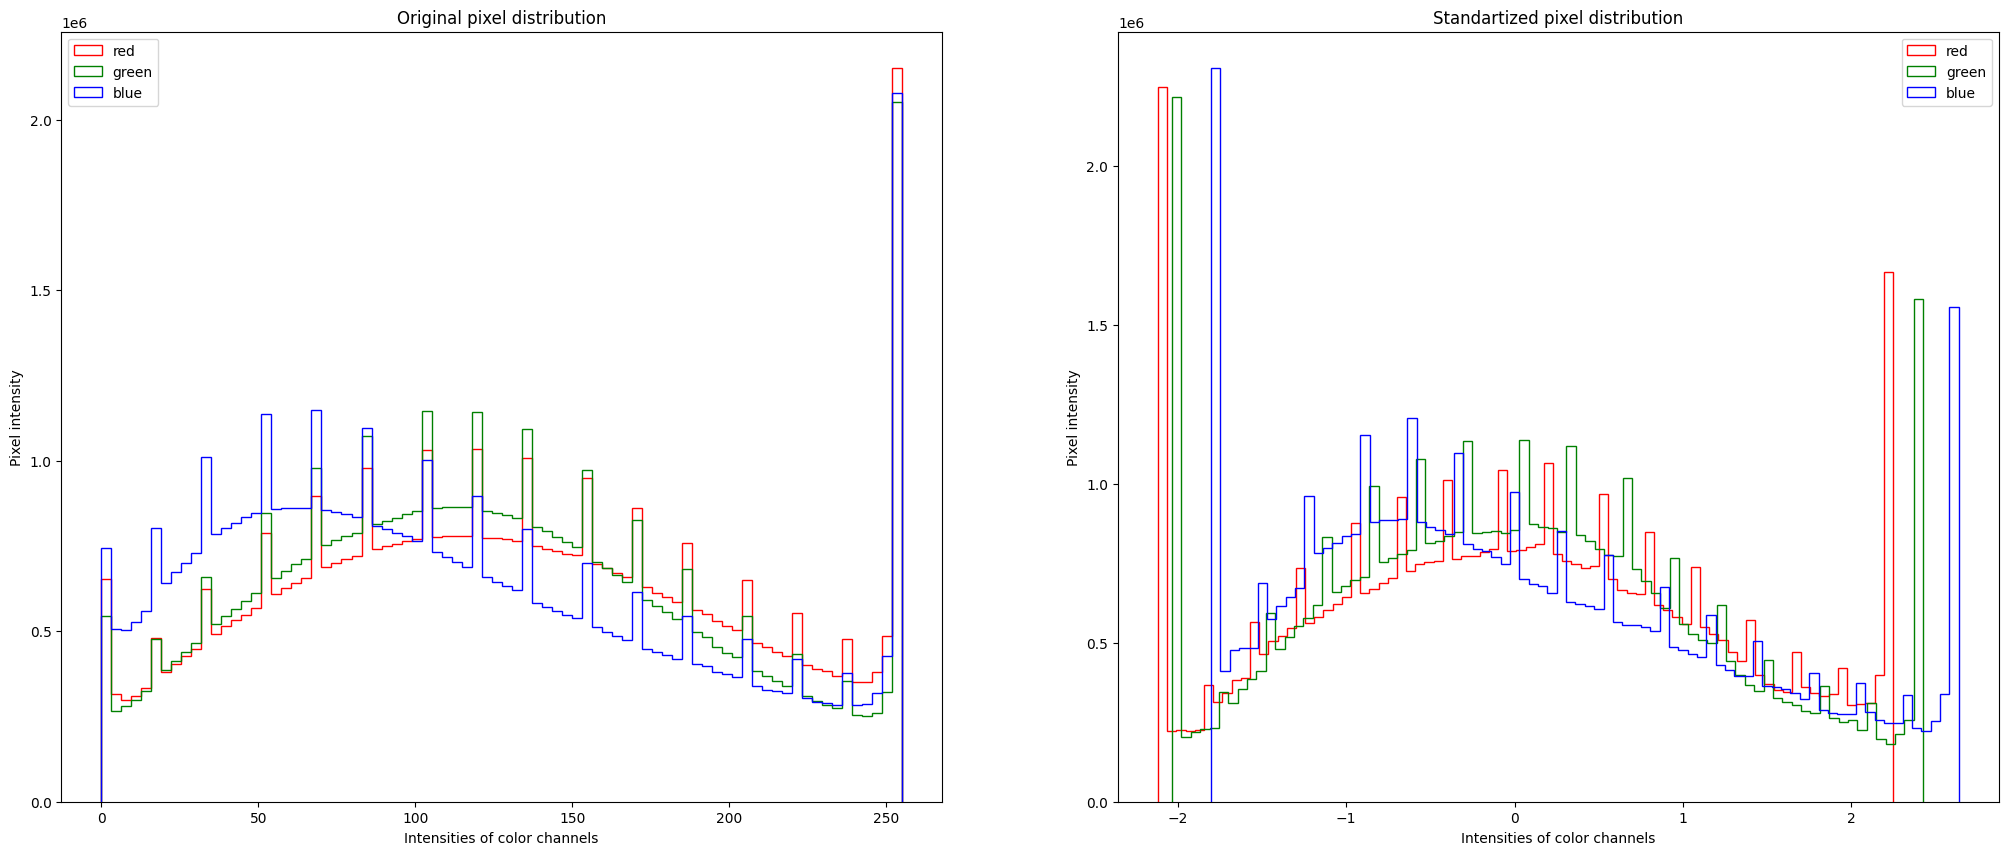

In [66]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.hist(red, bins=80,histtype="step",color="red",label="red")
plt.hist(green, bins=80,histtype="step",color="green",label="green")
plt.hist(blue, bins=80,histtype="step",color="blue",label="blue")
plt.xlabel("Intensities of color channels")
plt.title("Original pixel distribution")
plt.legend()
plt.ylabel("Pixel intensity")
plt.subplot(1,2,2)
plt.hist(red_image, bins=80,histtype="step",color="red",label="red")
plt.hist(green_image, bins=80,histtype="step",color="green",label="green")
plt.hist(blue_image, bins=80,histtype="step",color="blue",label="blue")
plt.legend()
plt.xlabel("Intensities of color channels")
plt.ylabel("Pixel intensity")
plt.title("Standartized pixel distribution")
plt.show()

>As it can be seen , green and red pixels undergoes almost the same pattern, while blue pixels are shifted to the left, meaning that we have more darker blue pixels,nevertheless we have huge amount of bright pixels for all colors.

>Raw Distribution (Left): The "Original pixel distribution" illustrates the pixel intensities in their native format (0–255). The histogram reflects the natural dynamic range of the source imagery.
<br>
<br>
>Normalized Distribution (Right): The "Standardized pixel distribution" displays the data after Z-score normalization. The pixel values have been rescaled to center around a mean of 0 with a standard deviation of 1, shifting the range to approximately $[-2, 2.5]$.

Bar chart for mean values for each color on pictures from not normalized dataset

In [9]:
mean = train_data.mean(axis=(0, 1, 2)) 
std = train_data.std(axis=(0, 1, 2)) 

In [35]:
red_mean = mean[0]
blue_mean = mean[2]
green_mean = mean[1]

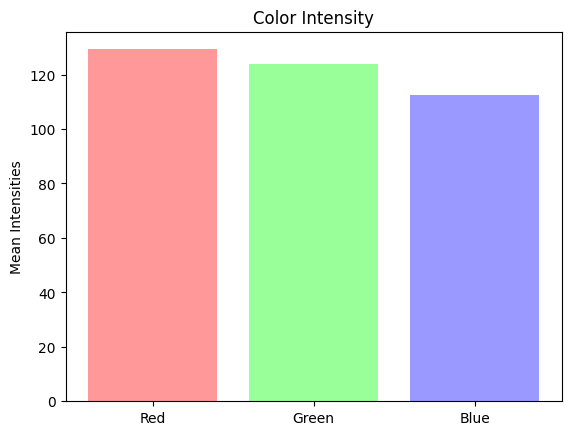

In [36]:
plt.bar( x=["Red","Green", "Blue"],height=[red_mean,green_mean,blue_mean], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

                                    Tabular representation of our data                                                           

We are reshaping train data, because DataFrame expects 2-dim input

In [37]:
train_d_reshaped = torch.from_numpy(train_data).reshape(50000,-1)


In [55]:
train_data = pd.DataFrame(train_d_reshaped)
train_labels = pd.DataFrame(train_labels, columns=["Lables"])

In [56]:
train_labels.head()

,Lables
0,19
1,29
2,0
3,11
4,1


Text(0.5, 1.0, 'Distribution of clasess for 1000 samples')

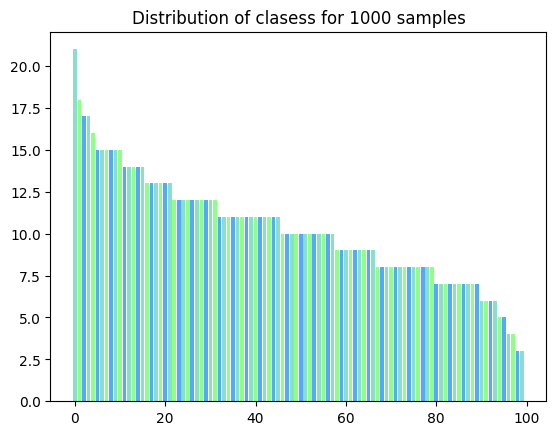

In [69]:
dictionary = {"labels" :y_sample}
y_loader_lables = pd.DataFrame(dictionary)
loader_labels = y_loader_lables.value_counts()
values = range(0,100)
plt.bar(x=values, height=loader_labels,color=["#89dfcb","#90ff86", "#53a9ff"])
plt.title("Distribution of clasess for 1000 samples")


Labels distribution in the train dataset(before random split into new training and validation datasets)

<BarContainer object of 100 artists>

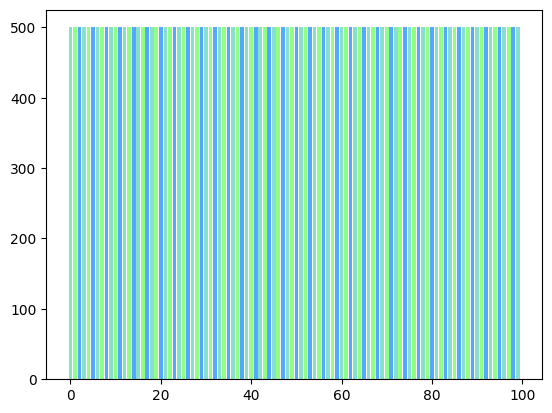

In [ ]:

labels_counts = train_labels.value_counts()


plt.bar(x=values, height=labels_counts,color=["#89dfcb","#90ff86", "#53a9ff"])

Tabular analytics of original training dataset

In [106]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,4,34,36,10,105,133,59,138,173,79
1,255,255,255,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,255,255,255
2,250,250,248,248,249,243,247,248,239,248,...,190,219,209,194,223,216,207,232,230,228
3,124,194,221,131,202,228,135,206,228,138,...,223,230,237,232,243,237,236,243,230,231
4,43,49,46,32,40,34,87,89,47,127,...,78,93,88,60,55,55,29,63,67,37


In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB


In [105]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,133.625820,138.897220,135.018180,133.620260,138.775640,134.77246,134.725600,139.695920,135.522380,135.45466,...,114.882480,128.734560,127.011120,115.011220,128.250380,126.764800,114.989160,128.053120,126.797400,115.323520
std,79.200295,76.739206,82.959109,78.232566,75.777258,82.16237,77.802072,75.335076,81.902624,77.53889,...,74.878401,74.018808,71.650393,75.256193,74.594984,72.219927,75.826336,75.287087,72.893317,76.474594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,77.000000,61.000000,68.000000,78.000000,61.00000,70.000000,80.000000,62.000000,71.00000,...,53.000000,69.000000,71.000000,53.000000,68.000000,70.000000,53.000000,67.000000,69.000000,52.000000
50%,130.000000,137.000000,132.000000,131.000000,138.000000,131.00000,132.000000,139.000000,133.000000,133.00000,...,102.000000,124.000000,121.000000,102.000000,122.000000,121.000000,102.000000,122.000000,120.000000,102.000000
75%,202.000000,204.250000,214.000000,200.000000,202.000000,212.00000,201.000000,203.000000,213.000000,202.00000,...,169.000000,187.000000,179.000000,169.000000,187.000000,179.000000,170.000000,188.000000,180.000000,172.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Searching for NULL values

In [109]:
train_data.isnull().sum().sum()

np.int64(0)